# Image Classfication with Deep Learning

"In practice, very few people train an entire Convolutional Network from scratch (with random initialization), because it is relatively rare to have a dataset of sufficient size. Instead, it is common to pretrain a ConvNet on a very large dataset (e.g. ImageNet, which contains 1.2 million images with 1000 categories), and then use the ConvNet either as an initialization or a fixed feature extractor for the task of interest." [cs231n](https://cs231n.github.io/transfer-learning/)

In [ ]:
!wget https://raw.githubusercontent.com/afterrealism/discovering1sand0s/main/style_transfer.py style_transfer.py
!jupyter nbextension enable --py widgetsnbextension

In [1]:
from PIL import Image
import io
from image_classification import *

## Load Data

We will use torchvision and torch.utils.data packages for loading the data.

The problem we’re going to solve today is to train a model to classify ants and bees. We have about 120 training images each for ants and bees. There are 75 validation images for each class. Usually, this is a very small dataset to generalize upon, if trained from scratch. Since we are using transfer learning, we should be able to generalize reasonably well.

This dataset is a very small subset of imagenet.

In [2]:
class1Widgets = widgets.Text(
    value='dog',
    placeholder='Type something',
    description='Class 1:',
    disabled=False
)
class1Widgets

Text(value='dog', description='Class 1:', placeholder='Type something')

In [3]:
class2Widgets = widgets.Text(
    value='cat',
    placeholder='Type something',
    description='Class 2:',
    disabled=False
)
class2Widgets

Text(value='cat', description='Class 2:', placeholder='Type something')

In [4]:
# create dir structure
data_dir = "data"
class_1 = class1Widgets.value
class_2 = class2Widgets.value
!rm -rf {data_dir}
!mkdir -p {data_dir}
!mkdir -p {data_dir}/train/{class_1}
!mkdir -p {data_dir}/train/{class_2}
!mkdir -p {data_dir}/val/{class_1}
!mkdir -p {data_dir}/val/{class_2}

In [4]:
download_classes_data(class1Widgets.value, class2Widgets.value)

https://www.businessinsider.in/photo/81878541/5-reasons-why-your-dog-is-constantly-scratching-themself.jpg?imgsize=180883 data/val/dog/0
https://2.bp.blogspot.com/-49Nd14clyQA/XLI0MRNJ8FI/AAAAAAAACao/4Q4hBY5YwhIIdw_ovO3x3uKDEa7ArKcFwCLcBGAs/w1200-h630-p-k-no-nu/f1.webp data/val/dog/1
https://www.petlandsarasota.com/wp-content/uploads/2019/02/blog13.jpg data/val/dog/2
https://images.wagwalkingweb.com/media/daily_wag/name_guides/baseball-related-dog-names/hero/baseball-inspired-dog-names.jpg data/val/dog/3
https://www.dogsforgood.org/app/uploads/2020/05/Rita-laptop-e1590071717327.jpg data/val/dog/4
https://www.growlsnarlsnap.com/wp-content/uploads/2020/08/aggressive-white-dog.jpg data/val/dog/5
https://static.inspiremore.com/wp-content/uploads/2020/11/16113038/Grumpy-Dog-Challenge-5.jpg data/val/dog/6
https://www.breedyourdog.com/uploads/listing_images/36218/103793/big_C19EB208-DF50-4262-8C91-F6BAECFD3D35.jpeg data/val/dog/7
https://images.wagwalkingweb.com/media/training_guides/retrieve

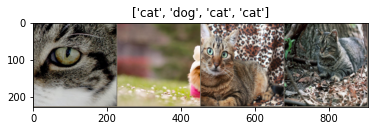

Epoch 0/24
----------
train Loss: 0.4840 Acc: 0.7118
val Loss: 0.0494 Acc: 1.0000

Epoch 1/24
----------
train Loss: 0.3649 Acc: 0.8118
val Loss: 0.0860 Acc: 0.9500

Epoch 2/24
----------
train Loss: 0.7483 Acc: 0.7412
val Loss: 0.0104 Acc: 1.0000

Epoch 3/24
----------
train Loss: 0.4796 Acc: 0.8118
val Loss: 0.0211 Acc: 1.0000

Epoch 4/24
----------
train Loss: 0.3389 Acc: 0.8647
val Loss: 0.0146 Acc: 1.0000

Epoch 5/24
----------
train Loss: 0.5390 Acc: 0.8353
val Loss: 0.1495 Acc: 0.8500

Epoch 6/24
----------
train Loss: 0.4466 Acc: 0.8118
val Loss: 0.1755 Acc: 0.9500

Epoch 7/24
----------
train Loss: 0.3178 Acc: 0.8882
val Loss: 0.0294 Acc: 1.0000

Epoch 8/24
----------
train Loss: 0.2938 Acc: 0.8647
val Loss: 0.0339 Acc: 1.0000

Epoch 9/24
----------
train Loss: 0.3928 Acc: 0.8353
val Loss: 0.0243 Acc: 1.0000

Epoch 10/24
----------
train Loss: 0.3182 Acc: 0.8882
val Loss: 0.0553 Acc: 0.9500

Epoch 11/24
----------
train Loss: 0.2491 Acc: 0.8882
val Loss: 0.0180 Acc: 1.0000

Ep

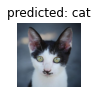

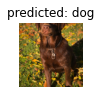

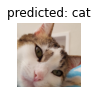

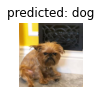

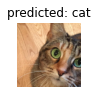

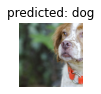

In [5]:
data_dir = 'data'
model, class_names = get_trained_model(data_dir='data')

## Make Prediction

In [6]:
print("Upload image to make prediction:")
uploaderPredictionImage = widgets.FileUpload()
uploaderPredictionImage

Upload image to make prediction:


FileUpload(value={}, description='Upload')

6.jpeg
Predicted Class: cat


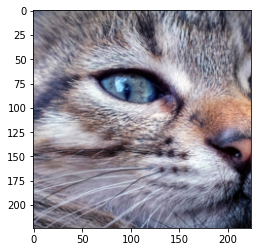

In [9]:
for file_name, file_info in uploaderPredictionImage.value.items():
    print(file_name)
    predictImage = Image.open(io.BytesIO(file_info['content']))
    with open(file_name, 'w') as f:
        predictImage.save(f)
    
    make_prediction(file_name, model, class_names)